In [1]:
import os
import cv2
import random
import matplotlib.pyplot as plt

base_dir = "data/Data_Brain/Train"

classes = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]




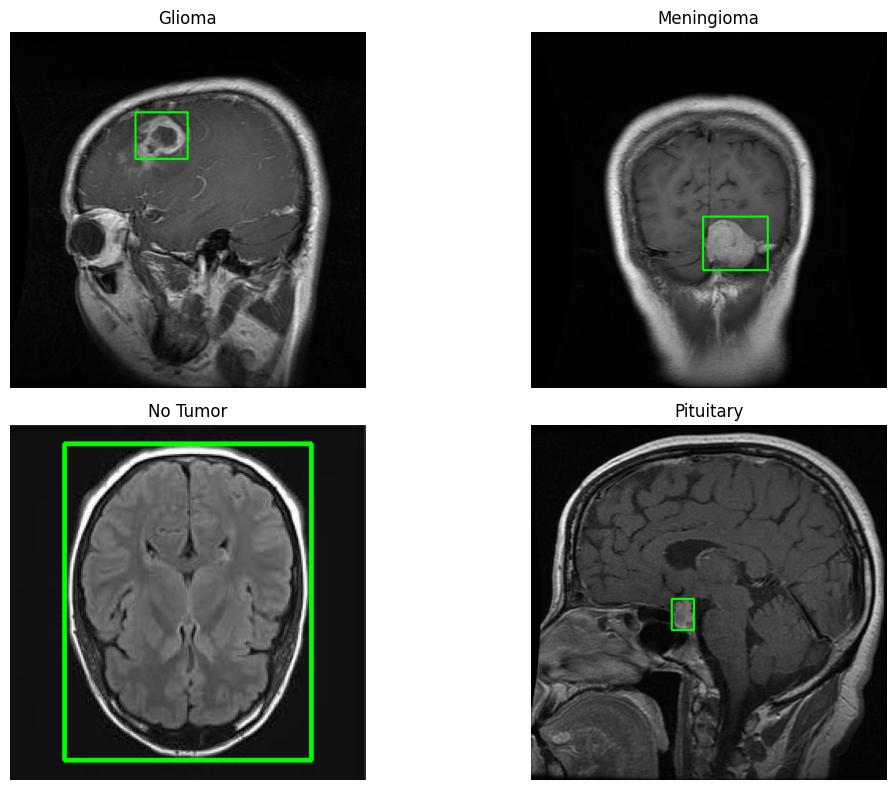

In [2]:

def draw_yolo_boxes(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 5:
                continue
            cls_id, x_center, y_center, bw, bh = map(float, parts)
            cls_id = int(cls_id)

            x_center, y_center, bw, bh = x_center * w, y_center * h, bw * w, bh * h
            x1 = int(x_center - bw / 2)
            y1 = int(y_center - bh / 2)
            x2 = int(x_center + bw / 2)
            y2 = int(y_center + bh / 2)

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image

plt.figure(figsize=(12, 8))
for i, cls in enumerate(classes):
    img_dir = os.path.join(base_dir, cls, "images")
    label_dir = os.path.join(base_dir, cls, "labels")

    images = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]
    if not images:
        continue
    img_file = random.choice(images)

    img_path = os.path.join(img_dir, img_file)
    label_path = os.path.join(label_dir, os.path.splitext(img_file)[0] + ".txt")

    if os.path.exists(label_path):
        img = draw_yolo_boxes(img_path, label_path)
    else:
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [4]:
import shutil

dic = {}
for cls in classes:
    img_dir = os.path.join(base_dir, cls, "images")
    label_dir = os.path.join(base_dir, cls, "labels")

    save_img_dir_train = f'{img_dir}/train'
    os.makedirs(save_img_dir_train, exist_ok=True)

    save_label_dir_train = f'{label_dir}/train'
    os.makedirs(save_label_dir_train, exist_ok=True)

    save_img_dir_valid = f'{img_dir}/valid'
    os.makedirs(save_img_dir_valid, exist_ok=True)

    save_label_dir_valid = f'{label_dir}/valid'
    os.makedirs(save_label_dir_valid, exist_ok=True)

    images = [f for f in os.listdir(img_dir) if f.lower().endswith((".jpg", ".png", ".jpeg"))]

    for img in images:
        img_path = os.path.join(img_dir, img)
        label_path = os.path.join(label_dir, os.path.splitext(img)[0] + ".txt")

        dic[label_path] = img_path

    # for label , img in dic.item:

    #     X_train, X_test, y_train, y_test = train_test_split(
    #     img, label, test_size=0.2, random_state=42


    #     if os.path.exists(label) : 
    #         shutil.copy(img_path,save_img_dir)
    #         shutil.copy(label_path,save_label_dir)
    #     else:
    #         continue    
            


      

